# Breast cancer prediction

## 1. Identify the problem

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

### 1.1 Expected outcome

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present / 0= Benign (Not Cancerous) -Absent

### 1.2 Objective

Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem. 

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

## Getting started: 

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

#Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Evaluation and comparison
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

### Loading Dataset

In [4]:
df = pd.read_csv(r'E:\Data_Science\Guvi\Projects\Final_project\datasets\cancer.csv')

### Inspecting the data 

The first step is to visually inspect the new data set. There are multiple ways to achieve this:

•	The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).

•	Alternatively, one can also use “df.tail()” to return the five rows of the data frame.

•	For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [28]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
df.shape

(569, 32)

In the result displayed, you can see the data has 569 records, each with 32 columns.

The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
#Check for missing values
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [32]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

## 2. Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

### 2.1 Objectives of Data Exploration

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

The purpose of EDA is:

1. To use summary statistics and visualizations to understand the data better

2. For data preprocessing to be successful, it is essential to have overall picture of the data

Next step is to explore the data. There are two approached used to examine the data using:

1. *Descriptive statistics* is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.


2. *Visualization* is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

### 2.2 Descriptive Statistics

Descriptive statistics is a means of describing features of a data set by generating summaries about data samples. Summary statistics are measurements meant to describe data.

In [33]:
df = df.drop('id',axis=1)

In [34]:
#basic descriptive statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
df.skew()

C:\Users\Srivatsan\AppData\Local\Temp\ipykernel_18904\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

#### The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [36]:
# Grouping by diagnosis and reviewing output
diag_gr = df.groupby('diagnosis',axis=0)
pd.DataFrame(diag_gr.size(),columns=['Number of observations'])

,Number of observations
diagnosis,
B,357
M,212


### Observation 
#### 357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

### 2.3 Unimodel Data visualization

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting **malignant** or **benign** cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.

1. Histograms
2. Density plots
3. Box and Whisker plots

<Axes: xlabel='diagnosis', ylabel='count'>

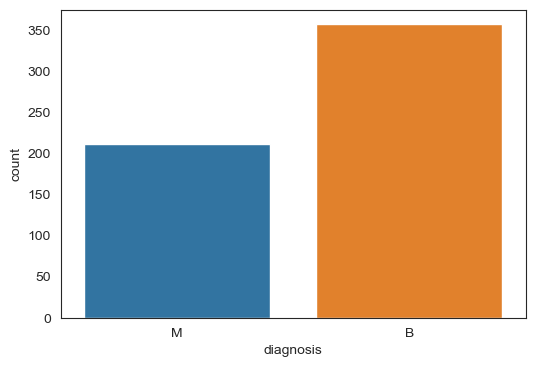

In [37]:
# Lets get the frequency of cancer diagnosis
sns.set_style('white')
sns.set_context({'figure.figsize':(6,4)})
sns.countplot(x = df['diagnosis'],data = df,label='Count')

### 2.3.1 Visualise distribution of data via histograms

Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

#### Separate columns into smaller dataframes to perform visualization

In [5]:
data_diag=df.loc[:,["diagnosis"]]

In [6]:
data_mean=df.iloc[:,1:11]
data_se=df.iloc[:,11:22]
data_worst=df.iloc[:,23:]

### Histogram the "_mean" suffix designition

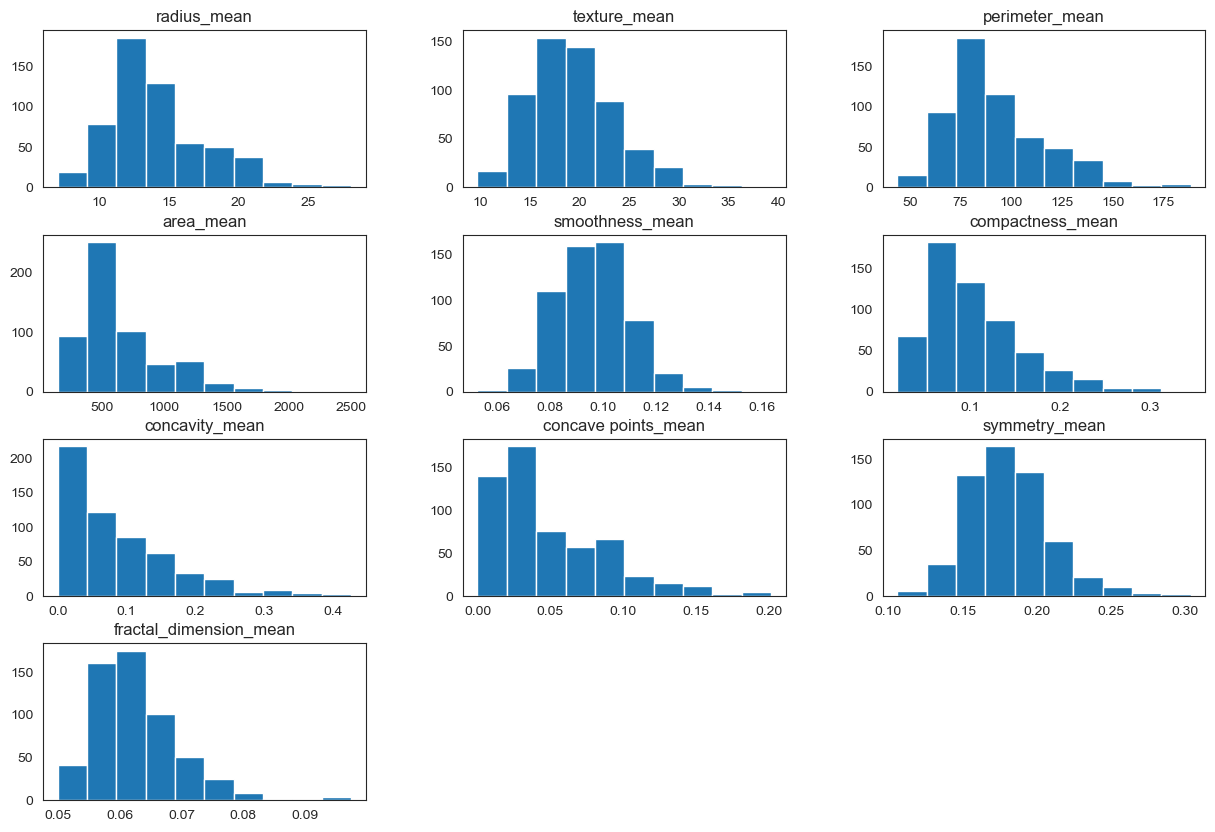

In [40]:
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

### Histogram for the "_se" suffix designition

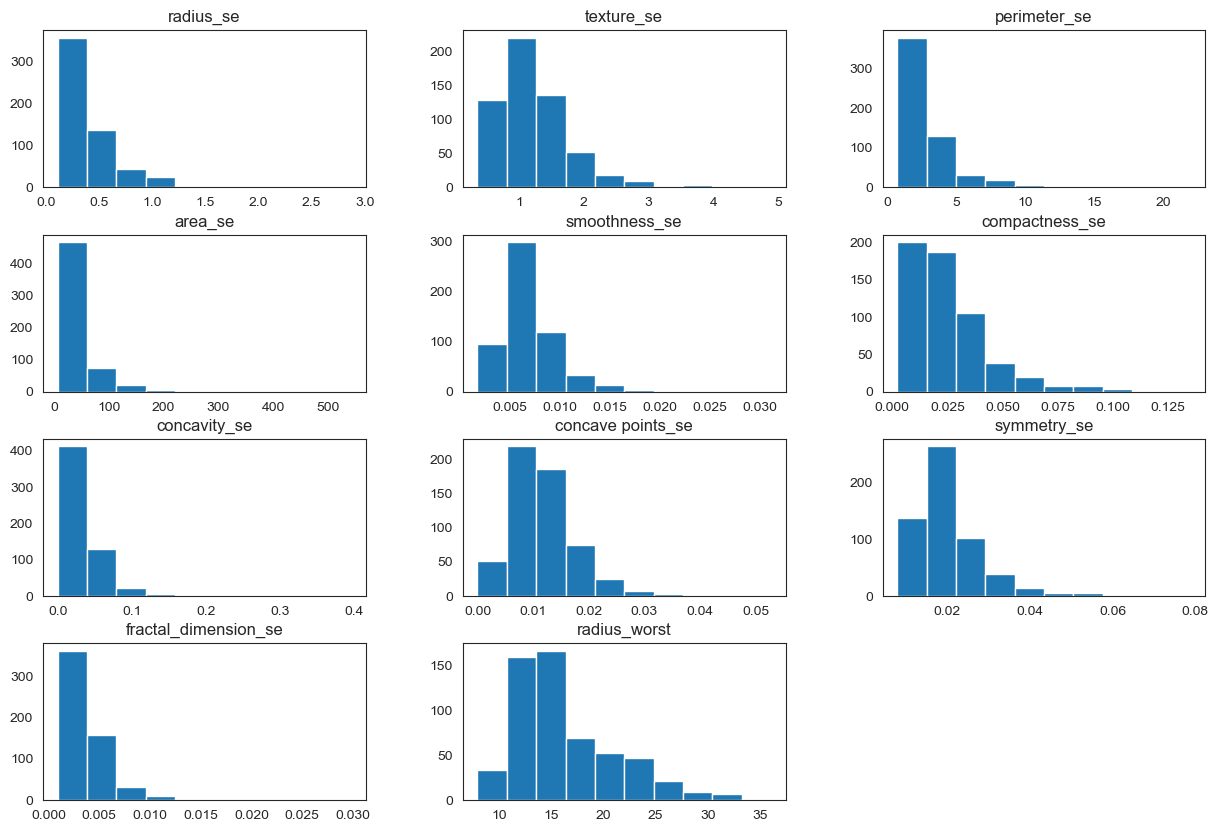

In [41]:
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### Histogram "_worst" suffix designition

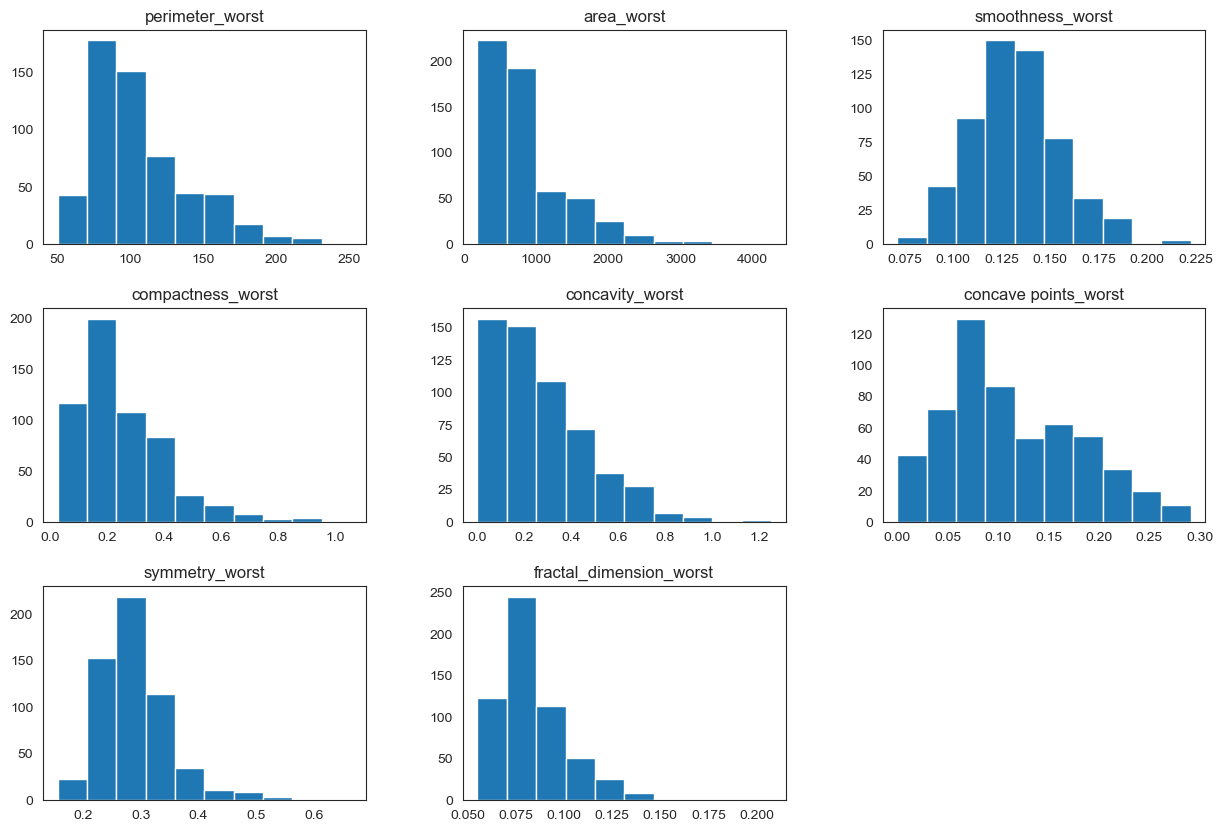

In [42]:
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

### Observation
#### We can see that perhaps the attributes concavity,and concavity_point may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

### 2.3.2 Visualize distribution of data via density plots

### Density plots "_mean" suffix designition

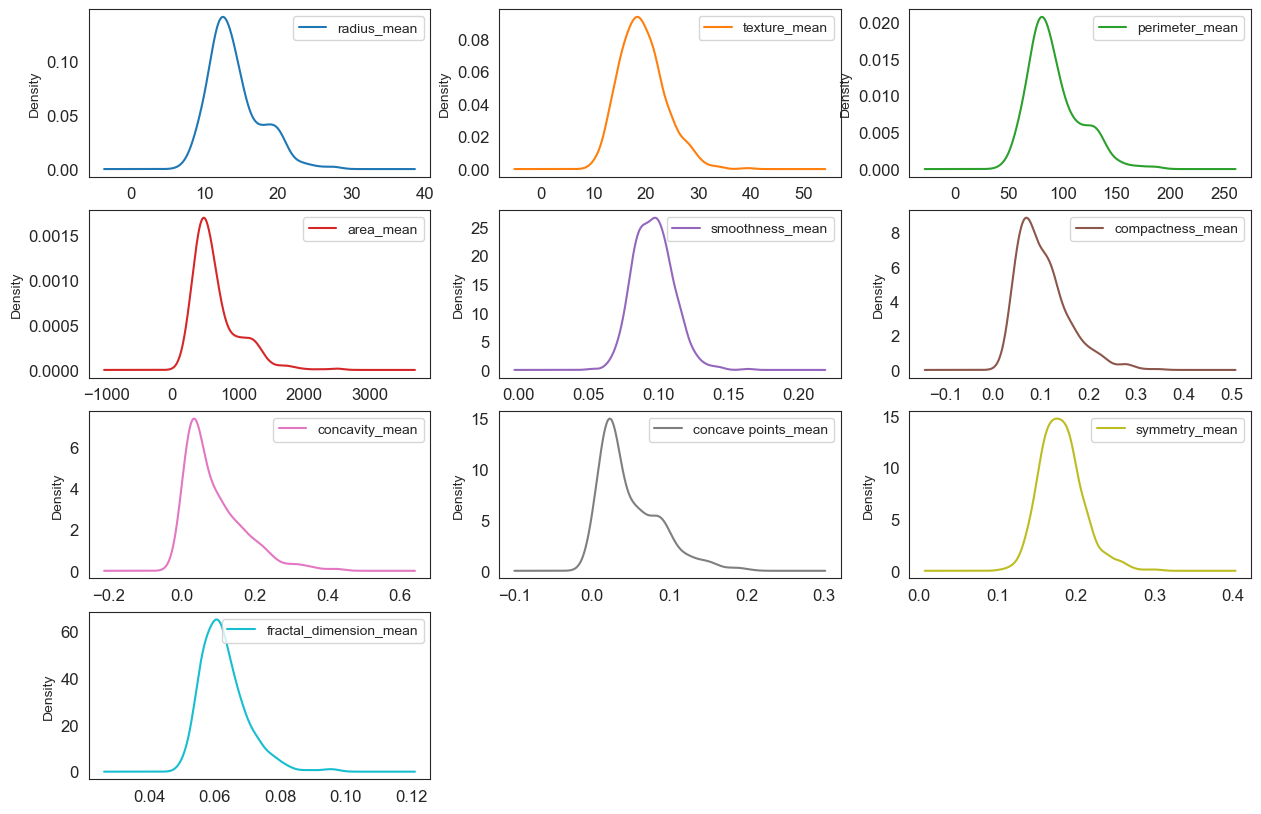

In [43]:
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,sharey=False,fontsize=12, figsize=(15,10))

### Density plots "_se" suffix designition

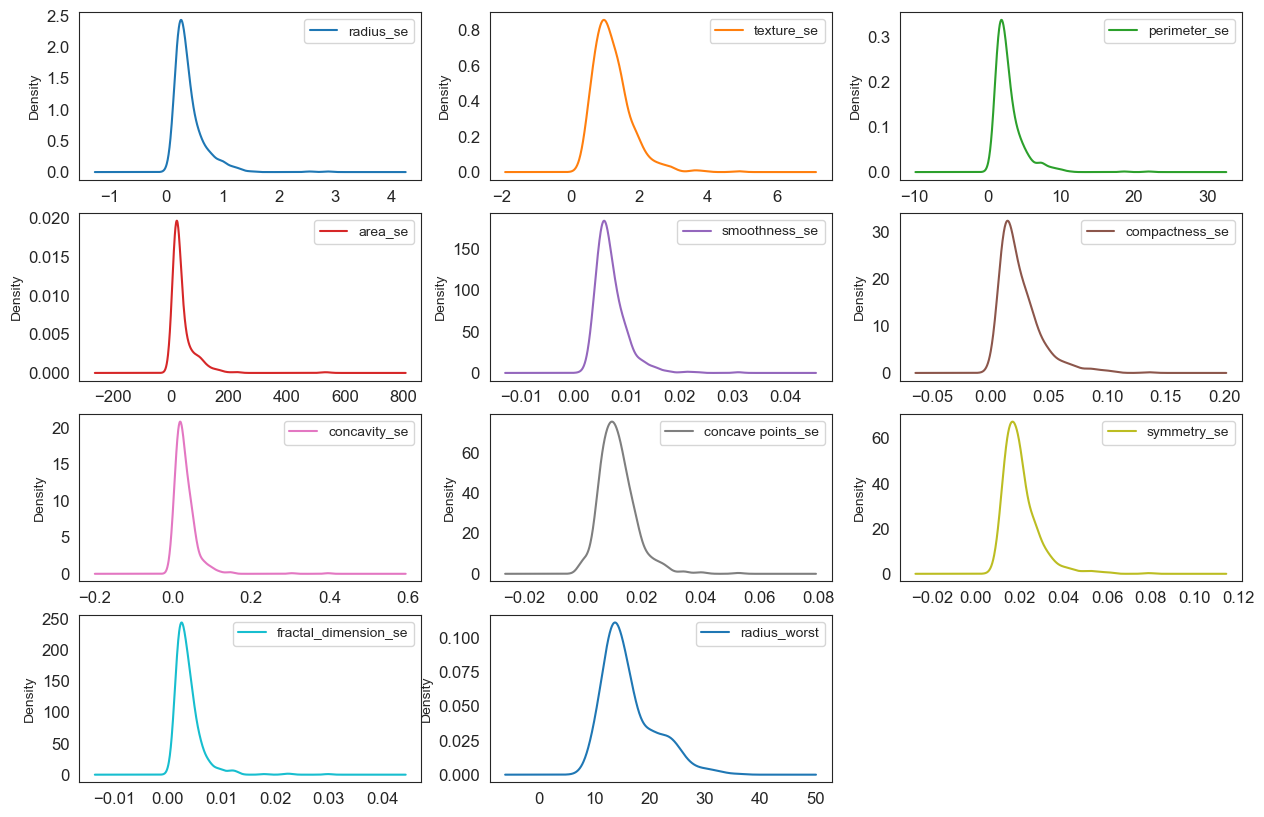

In [44]:
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,sharey=False,fontsize=12, figsize=(15,10))

### Density plot "_worst" suffix designition

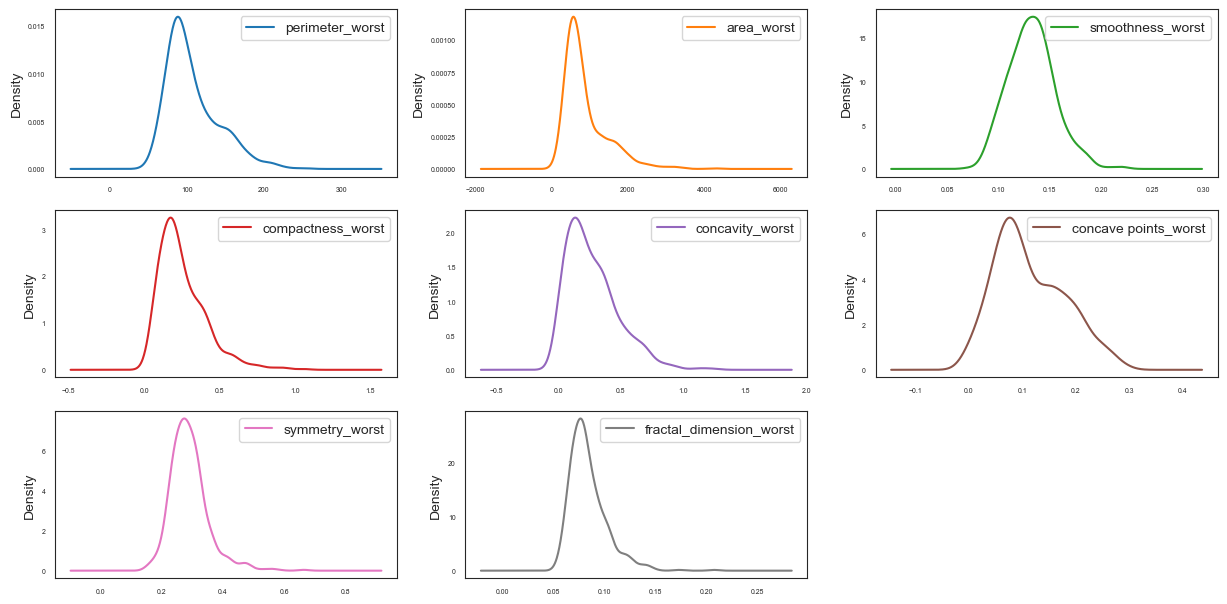

In [45]:
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5,figsize=(15,10))

### Observation

#### We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution. We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

### 2.4 Multimodel Data visualization

Multimodel data visualization can be done by:

1. Scatter plots

2. Correlation matrix

### Correlation Matrix

C:\Users\Srivatsan\AppData\Local\Temp\ipykernel_18904\1810565391.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

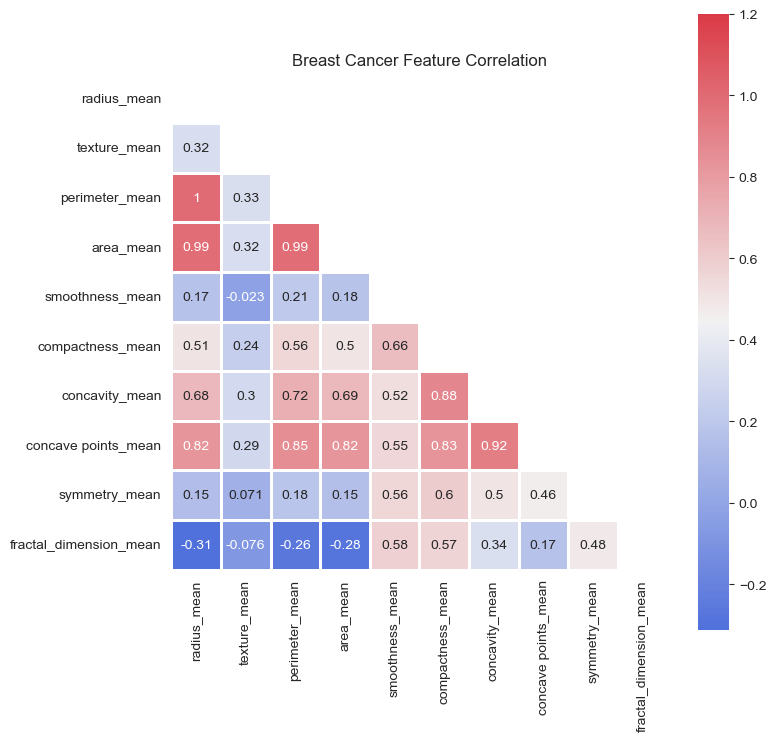

In [61]:
# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plot.subplots(figsize=(8, 8))
plot.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,ax=ax,annot=True, fmt='.2g',linewidths=2)

### Observations

We can see strong positive relationship exists with mean values paramaters between 1-0.75:

1. The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;

2. Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc

3. Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

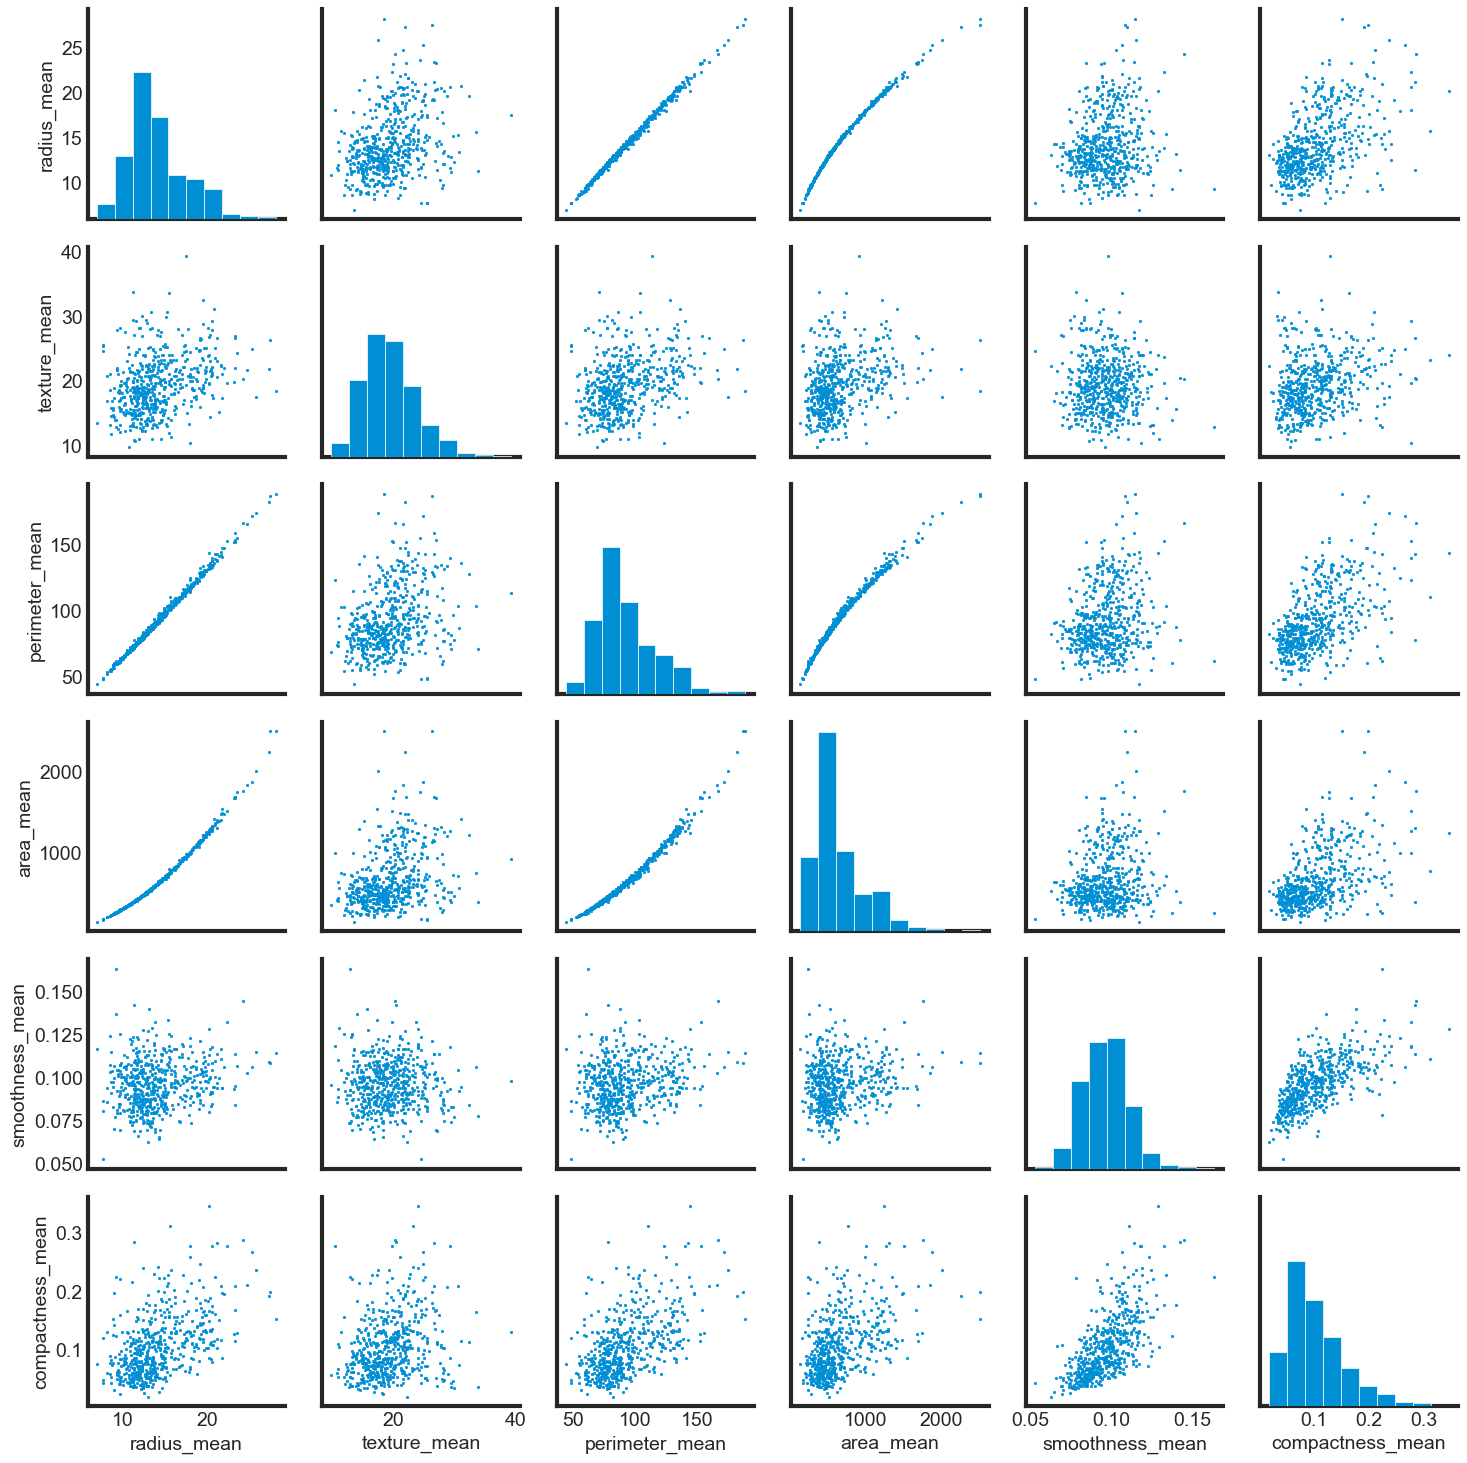

In [66]:
plot.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.PairGrid(df[[df.columns[1],df.columns[2],df.columns[3],
                     df.columns[4], df.columns[5],df.columns[6]]])
g = g.map_diag(plot.hist)
g = g.map_offdiag(plot.scatter, s = 3)

### Summary:

1.	Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tend to show a correlation with malignant tumours.

2.	Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

3.	In any of the histograms there are no noticeable large outliers that warrants further clean-up.


## 3. Encoding the Categorical Data

### Since the analysis part is done, we are moving on to the machine learning part.

### As we know machine learning algorithms can read only numerical values, it is essential to encode the categorical features into numerical data

In [68]:
# Label Encoder

LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

We have encoded the value of Malignant - 1 and Benign - 0

### 3.1 Premodeling

### Separating the independent and dependent variables

In [69]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

### 3.2 Splitting the dataset

In Machine learning we must split the dataset into training and testing data:

• the training set called also learning set that we will use to train our model, it has the big part.

• the testing set: is used to evaluate the performance of the model after hypermarameter tuning, It's also useful to get an idea of how different models (SVMs, Neural Networks, Random forests...) perform against each other.

• So creating the test set is easy, we just select a few rondom rows, in general we give it 10% or 20%.

• SKit_Learn provides a function of splitting the dataset into multiples subsets.

• train_test_split(), is the simplest way wich the same as the function: split_train_test(), the method accepts lists, numpy arrays, scipy sparse matrices or pandas dataframes. We will also identify some parameters, like the random_state that allows you to set the random generator seed.

• The ideal split is said to be 80:20 for training and testing. You may need to adjust it depending on the size of the dataset and parameter complexity.

In [74]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

### 3.3 Feature Scaling

**Feature scaling is a method used to standardize the range of independent variables or features of data. Scaling the data is very important to boost the score**

Feature Scaling, is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range.

There are two ways for scaling the dataset:

-Standardization

-Min_Max Scaling

•	Standardization : it substract the mean value( so standardized values always have a zero mean), and then it divides by the standard deviation, this method doesn't have a specific range from 0 to 1, that may cause a problem for many algorithms like Neural Network often expect an input value ranging from 0 to 1.
Sckit-Learn provides a transformer caller StandardScaler. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

•	Min_Max : called also Normalization, is the simplest way to scaling data, values are shifted and rescaled again so that the end up ranging from 0 to 1. we do this by substraction the min value and dividing by the Max minus the Min.
Sckit-learn provides a transformer callec MinMaxScaler. It have a hyperparameter called "Feature Range" to specify the range that you want.


In [75]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

### 3.4 Modeling

•	In this part we'll try differents models of Machine learning: Logistic Regression, Gradient Boosting Classifier,Random Forest,XGB Classifier,Support Vector Machine, Decision tree and KNeighbors Model.

In [76]:
# Logistic Regression

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier

GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)


# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [77]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## 4. Evaluation and comparison of all the models

In [78]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))

In [79]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.982456,SVC
1,0.929825,DecisionTreeClassifier
2,0.973684,LogisticRegression
3,0.947368,KNeighborsClassifier
4,0.956140,RandomForestClassifier
5,0.964912,GradientBoostingClassifier
6,0.956140,XGB


### We can clearly observe that SVC model has top most accuracy of 98.2% followed by the Logistic Regression model accuracy of 97.3%. We can conclude that SVC works best for this dataset.

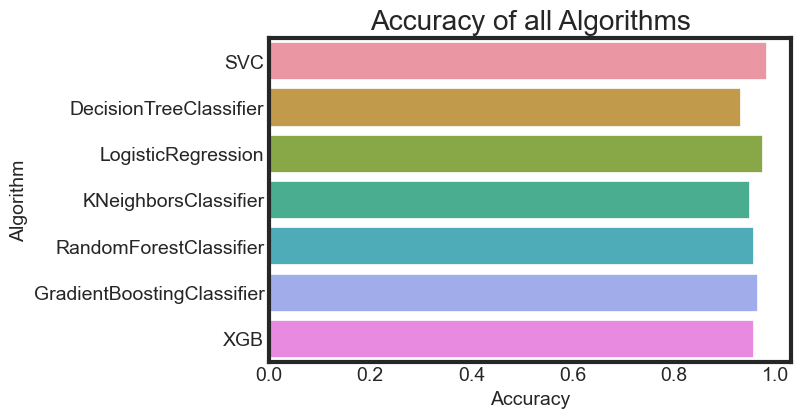

In [82]:
sns.barplot(x = data_frame['Accuracy'],y = data_frame['Algorithm'],data = df).set_title('Accuracy of all Algorithms')
plot.show()

### 4.1 Evaluating The Performance of the model¶
Evaluating the machine learning model is a crucial part in any data science project. There are many metrics that helps us to evaluate our model accuracy.

• Classification Accuracy

• Confusion matrix

• Precision

• Recall

• classification_report

• ROC AUC Score

Now, let's see the performance metrics of svc classifier

### 4.2 Confusion Matrix

•	A confusion matrix is a table that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class


In a binary classifier, the "true" class is typically labeled with 1 and the "false" class is labeled with 0.

•	True Positive: A positive class observation (1) is correctly classified as positive by the model.

•	False Positive: A negative class observation (0) is incorrectly classified as positive.

•	True Negative: A negative class observation is correctly classified as negative.

•	False Negative: A positive class observation is incorrectly classified as negative.

Let’s visualize the confusion matrix, to see how accurate are the results we obtained.

In [83]:
cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,41,2
healthy,0,71


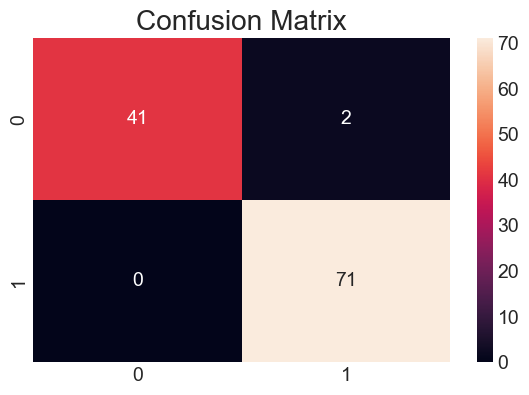

In [87]:
sns.heatmap(cm,annot=True,fmt='g')
plot.title('Confusion Matrix')
plot.show()

As we can see from the table above:

**True Positive(TP)**: Values that the model predicted as yes(Healthy), and is actually yes(Healthy).

**True Negative(TN)**: Values that the model predicted as not(Cancer), and is actually no(Cancer).

**False Positive(FP)**: Values that the model predicted as yes(Healthy), but actually no(Cancer).

**False Negative(FN)**: Values that the model predicted as no (Cancer), but actually yes(Healthy).

**For this dataset, whenever the model is predicting something as yes, it indicates Absence of cancer cells (Healthy) and for cases when the model predicting no; it indicates existence of cancer cells(Cancer)**

### 4.3 Accuracy Score

**Accuracy Score** is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations

In [89]:
print('Accuracy Score:',accuracy_score(y_test, y_pred_svc))

Accuracy Score: 0.9824561403508771


### 4.4 Precision

**Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.

In [92]:
print('Precision value:',precision_score(y_test, y_pred_svc))

Precision value: 1.0


### 4.5 Recall

**Recall** also called Sensitivity, is the ratio of positive instances that are correctly detected by the classifier to the all observations in actual class

In [95]:
print('Recall value:',recall_score(y_test, y_pred_svc))

Recall value: 0.9534883720930233


### 4.6 Classification Report

In [98]:
print('--------------------Classification Report--------------------')
print(classification_report(y_test, y_pred_svc))

--------------------Classification Report--------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



True Positive(TP) : 71

True Negative(TN) : 41

False Positive(FP): 2

False Negative(FN): 0

**True Positive Rate/Recall/Sensitivity: How often the model predicts yes(Healthy) when it's actually yes(Healthy)?**

          ->True Positive Rate(TPR) = TP/TP+FP = 71/(871+2) = 0.97

**False Positive Rate: How often the model predicts yes(Healthy) when it's actually no(Cancer)?**

          ->False Positive Rate(FPR) = FP/FP+TN = 2/2+41 = 0.04

### 4.7 The ROC Curve

### The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR)

ROC AUC SCORE: 0.99737962659679


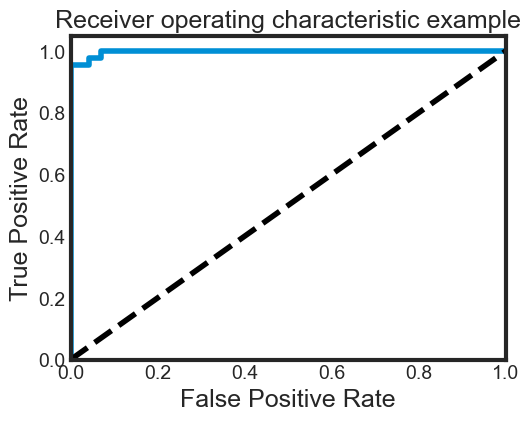

In [100]:
#plt.style.use('seaborn-pastel')

y_score = svc.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print('ROC AUC SCORE:',ROC_AUC)

plot.figure(figsize =[5,4])
plot.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plot.plot([0,1],[0,1], 'k--', linewidth = 4)
plot.xlim([0.0,1.0])
plot.ylim([0.0,1.05])
plot.xlabel('False Positive Rate', fontsize = 18)
plot.ylabel('True Positive Rate', fontsize = 18)
plot.title('Receiver operating characteristic example', fontsize= 18)
plot.show()

## Conclusion:

###  We can conclude that SVC Classifier gives a curve closer to the top-left corner; so it indicates a better performance of attaining an accuracy of 98.2% compared to all the other models. 